# Regridding debugging

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from astropy.io import fits

In [3]:
mission = 'COBE-FIRAS'

path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'
files = os.listdir(path + mission)

for file in files:
    if file != 'regridded':
        obs = fits.open(path + mission + '/' + file)
        print(file)
        print()
        pprint(obs[0].header)
        print()
        pprint(obs[1].header)
        print('\n-------------\n')

FIRAS_LINE_EMISSION_MAP_HIGH.FITS

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '03/12/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite          
INSTRUME= 'FIRAS   '           /  COBE instrument [DIRBE, DMR, FIRAS]     

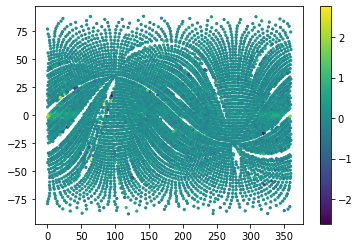

In [15]:
obs = fits.open(path + mission + '/FIRAS_LINE_EMISSION_MAP_HRES.FITS')
cm = plt.scatter(obs[1].data['GAL_LON'], obs[1].data['GAL_LAT'], c=obs[1].data['LINE_FLU'][:, 2], s=5)
plt.colorbar(cm)

In [18]:
obs_data.max()

0.10745467760884543

/tmp/ipykernel_440190/3743210424.py:44: RuntimeWarning: invalid value encountered in log10
  obs_data = np.log10(obs_data)
/tmp/ipykernel_440190/3743210424.py:45: RuntimeWarning: invalid value encountered in log10
  obs_error = np.log10(obs_error)


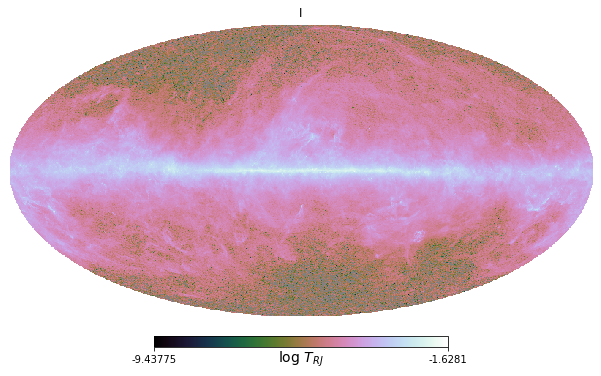

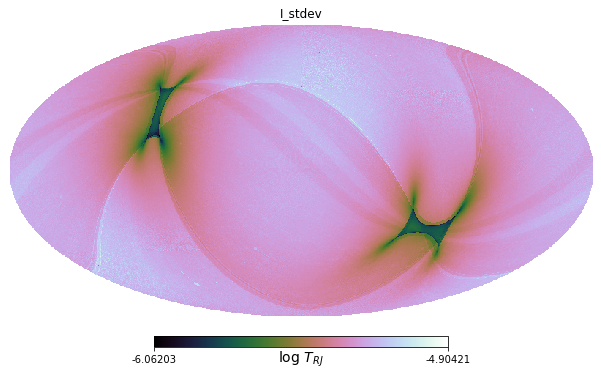

In [31]:
import healpy as hp

mission = 'Planck'
log = True

# Available files:
#  - COM_CompMap_dust-commander_0256_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits
#  - COM_CompMap_dust-commrul_2048_R1.00.fits
file = '/COM_CompMap_dust-commrul_2048_R1.00.fits'

obs = fits.open(path + mission + file)
if obs[1].header['ORDERING'] == 'NESTED':
    nest = True
else:
    nest = False
if 'commander' in file:
    value = 'I_ML'
    obs_data = obs[1].data[value] * 1e-6
    vmin = None
    vmax = None
elif 'GNILC' in file:
    value = 'I'
    freq = int(file.split('F')[1].split('_')[0])
    obs_data = obs[1].data[value] * 32.56 / freq**2
    vmax = 1 * 32.56 / freq**2
    vmin = 0 * 32.56 / freq**2
elif 'commrul' in file:
    value = 'I'
    value_error = 'I_stdev'
    obs_data = obs[1].data[value] * 32.56 / 545**2
    # print(obs_data.min(), obs_data.max())
    # print(obs_data.min() * 32.56 / 545**2, obs_data.max() * 32.56 / 545**2)
    obs_error = obs[1].data[value_error] * 32.56 / 545**2
    # print(obs_error.min(), obs_error.max())
    # print(obs_error.min() * 32.56 / 545**2, obs_error.max() * 32.56 / 545**2)
    vmin = None
    vmax = None
else:
    exit()
if log:
    obs_data = np.log10(obs_data)
    obs_error = np.log10(obs_error)
    if vmax:
        vmin = max(np.log10(vmin), obs_data.min())
    if vmin:
        vmax = np.log10(vmax)
# pprint(obs[1].header)
hp.mollview(obs_data, nest=nest, title=value, cmap='cubehelix', unit=r'log $T_{RJ}$', min=vmin, max=vmax)
hp.mollview(obs_error, nest=nest, title=value_error, cmap='cubehelix', unit=r'log $T_{RJ}$', min=vmin, max=vmax)

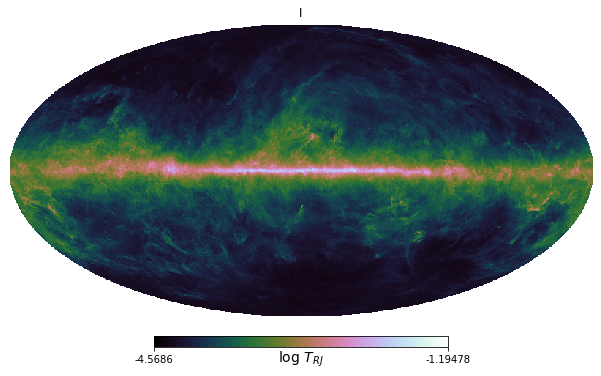

In [33]:
import healpy as hp

mission = 'Planck'
log = True

# Available files:
#  - COM_CompMap_dust-commander_0256_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits
#  - COM_CompMap_dust-commrul_2048_R1.00.fits
file = '/COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits'

obs = fits.open(path + mission + file)
if obs[1].header['ORDERING'] == 'NESTED':
    nest = True
else:
    nest = False
if 'commander' in file:
    value = 'I_ML'
    obs_data = obs[1].data[value] * 1e-6
    vmin = None
    vmax = None
elif 'GNILC' in file:
    value = 'I'
    freq = int(file.split('F')[1].split('_')[0])
    obs_data = obs[1].data[value] * 32.56 / freq**2
    vmax = None#1 * 32.56 / freq**2
    vmin = None#0 * 32.56 / freq**2
elif 'commrul' in file:
    value = 'I'
    value_error = 'I_stdev'
    obs_data = obs[1].data[value] * 32.56 / 545**2
    # print(obs_data.min(), obs_data.max())
    # print(obs_data.min() * 32.56 / 545**2, obs_data.max() * 32.56 / 545**2)
    obs_error = obs[1].data[value_error] * 32.56 / 545**2
    # print(obs_error.min(), obs_error.max())
    # print(obs_error.min() * 32.56 / 545**2, obs_error.max() * 32.56 / 545**2)
    vmin = None
    vmax = None
else:
    exit()
if log:
    obs_data = np.log10(obs_data)
    # obs_error = np.log10(obs_error)
    if vmax:
        vmin = max(np.log10(vmin), obs_data.min())
    if vmin:
        vmax = np.log10(vmax)
# pprint(obs[1].header)
hp.mollview(obs_data, nest=nest, title=value, cmap='cubehelix', unit=r'log $T_{RJ}$', min=vmin, max=vmax)
# hp.mollview(obs_error, nest=nest, title=value_error, cmap='cubehelix', unit=r'log $T_{RJ}$', min=vmin, max=vmax)

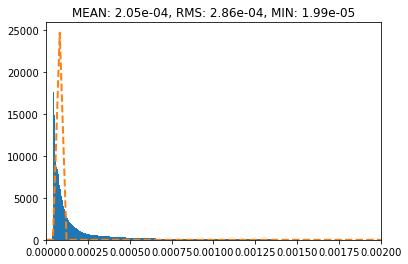

In [241]:
vlim = 0.002
plt.hist(obs_data[obs_data<vlim], bins=500, density=True)
plt.xlim([0, vlim])
x = np.linspace(0, vlim)
y = 25000*np.exp(-(x-8e-5)**2/2/(1e-5)**2)
plt.plot(x, y, ls='--', lw=2)
plt.title('MEAN: {:.2e}, RMS: {:.2e}, MIN: {:.2e}'.format(obs_data[obs_data<vlim].mean(), obs_data[obs_data<vlim].std(), obs_data[obs_data<vlim].min()));

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

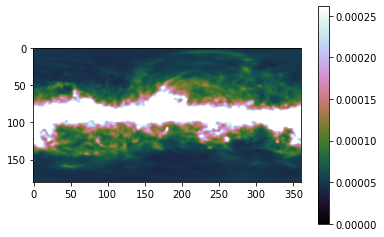

In [34]:
mission = 'Planck'

obs = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F353_regridded.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
cm = plt.imshow(obs[0].data[:, :][::-1, ::-1], vmin=0, vmax=0.000261297, cmap='cubehelix')
plt.colorbar(cm)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

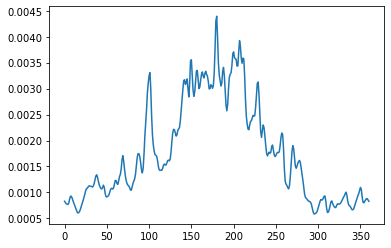

In [37]:
mission = 'Planck'

obs = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F353_regridded.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
plt.plot(obs[0].data[:, :][85:95, ::-1].mean(0))